In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split , GridSearchCV

In [3]:
import datetime
from datetime import date

In [4]:
import scipy.stats as stat
import pylab 

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score ,auc

In [7]:
from sklearn.metrics import accuracy_score ,recall_score , precision_score

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , plot_confusion_matrix 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [9]:
pd.pandas.set_option('display.max_columns',None)

In [10]:
data = pd.read_excel('C:\KHILADI/marketing_campaign.xlsx')

In [11]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [12]:
data.shape

(2240, 29)

In [13]:
(data.isnull().sum() / len(data))*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [14]:
df = data.copy()

In [15]:
x = df.copy()
y = df['Response']

In [16]:
(y.value_counts()/len(y))*100

0    85.089286
1    14.910714
Name: Response, dtype: float64

In [17]:
x_train , x_test , y_train , y_test = train_test_split( x,y,train_size=0.7,random_state=0,stratify=y)

In [18]:
(y_train.value_counts()/len(y_train))*100

0    85.076531
1    14.923469
Name: Response, dtype: float64

In [19]:
(x_train.isnull().sum() / len(x_train))*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.211735
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [20]:
x_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
661,7093,1985,Graduation,Married,19986.0,1,0,2013-11-14,74,3,6,5,0,2,6,1,0,0,3,7,0,0,0,0,0,0,3,11,0
1052,4475,1949,PhD,Married,69098.0,0,0,2013-02-16,82,1315,22,780,145,0,178,1,7,8,9,5,0,0,0,0,0,0,3,11,0
1885,10702,1984,Graduation,Single,52413.0,1,0,2012-11-03,67,185,8,133,56,56,12,2,7,1,7,7,0,0,0,0,0,0,3,11,0
2026,4198,1965,Graduation,Together,29672.0,1,1,2013-03-12,6,9,1,3,0,4,8,1,0,0,3,6,0,0,0,0,0,0,3,11,0
1275,10319,1971,Graduation,Married,66303.0,0,1,2013-02-26,56,1090,12,96,16,12,60,4,3,4,11,8,0,1,0,0,0,0,3,11,0


In [21]:
x_train.shape

(1568, 29)

In [22]:
x_train.drop(['ID'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
x_test.drop(['ID'],axis=1,inplace=True)

In [24]:
x_train['Income'].isnull().sum()

19

In [25]:
c = x_train.loc[x_train['Income'].isnull()]
c

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
90,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
1383,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
2079,1954,Master,Together,NaN,0,1,2013-06-23,83,161,0,22,0,0,24,2,4,1,4,6,0,0,0,0,0,0,3,11,0
2228,1978,2n Cycle,Together,NaN,0,0,2012-08-12,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,3,11,0
312,1989,Graduation,Married,NaN,0,0,2013-06-03,69,861,138,461,60,30,61,1,6,5,12,3,0,1,0,1,0,0,3,11,0
58,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
2084,1943,Master,Widow,NaN,0,0,2013-10-30,75,532,126,490,164,126,126,1,5,5,11,1,0,0,1,0,0,0,3,11,1
48,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
1386,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,3,11,0


In [26]:
x_train.dropna(axis=0,inplace=True)
x_test.dropna(axis=0,inplace=True)

<ipython-input-26-1316d6fad147>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.dropna(axis=0,inplace=True)
<ipython-input-26-1316d6fad147>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.dropna(axis=0,inplace=True)


In [27]:
y_train = x_train['Response']
y_test = x_test['Response']

In [28]:
x_train.shape

(1549, 28)

In [29]:
x_train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
661,1985,Graduation,Married,19986.0,1,0,2013-11-14,74,3,6,5,0,2,6,1,0,0,3,7,0,0,0,0,0,0,3,11,0
1052,1949,PhD,Married,69098.0,0,0,2013-02-16,82,1315,22,780,145,0,178,1,7,8,9,5,0,0,0,0,0,0,3,11,0
1885,1984,Graduation,Single,52413.0,1,0,2012-11-03,67,185,8,133,56,56,12,2,7,1,7,7,0,0,0,0,0,0,3,11,0
2026,1965,Graduation,Together,29672.0,1,1,2013-03-12,6,9,1,3,0,4,8,1,0,0,3,6,0,0,0,0,0,0,3,11,0
1275,1971,Graduation,Married,66303.0,0,1,2013-02-26,56,1090,12,96,16,12,60,4,3,4,11,8,0,1,0,0,0,0,3,11,0


In [30]:
x_train['Year_Birth'].corr(x_train['Response'])

0.007602565838109908

In [31]:
len(x_train['Year_Birth'].unique())

57

In [32]:
x_train['Year_Birth'].value_counts()

1971    70
1976    58
1970    57
1975    54
1965    54
1972    53
1974    51
1969    50
1973    49
1978    47
1968    39
1956    38
1977    37
1966    37
1955    36
1952    36
1963    34
1958    33
1959    33
1962    33
1979    33
1951    32
1982    32
1960    32
1967    31
1954    31
1986    30
1980    30
1957    29
1983    29
1964    29
1953    26
1984    25
1985    24
1981    24
1988    21
1987    20
1949    19
1961    19
1989    18
1950    17
1948    15
1947    13
1946    13
1992    12
1990    11
1991     8
1945     6
1943     5
1944     5
1995     3
1994     2
1993     2
1899     1
1900     1
1940     1
1996     1
Name: Year_Birth, dtype: int64

In [33]:
x_train['Education'].unique()

array(['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic'], dtype=object)

In [34]:
x_train['Education'].value_counts()

Graduation    793
PhD           318
Master        267
2n Cycle      129
Basic          42
Name: Education, dtype: int64

In [35]:
a = x_train.loc[x_train['Education']=='Master']
a['Response'].mean()

0.15730337078651685

In [36]:
b = x_train.loc[x_train['Education']=='2n Cycle']
b['Response'].mean()

0.10077519379844961

In [37]:
x_train['Marital_Status'].value_counts()

Married     593
Together    401
Single      335
Divorced    156
Widow        59
Alone         2
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


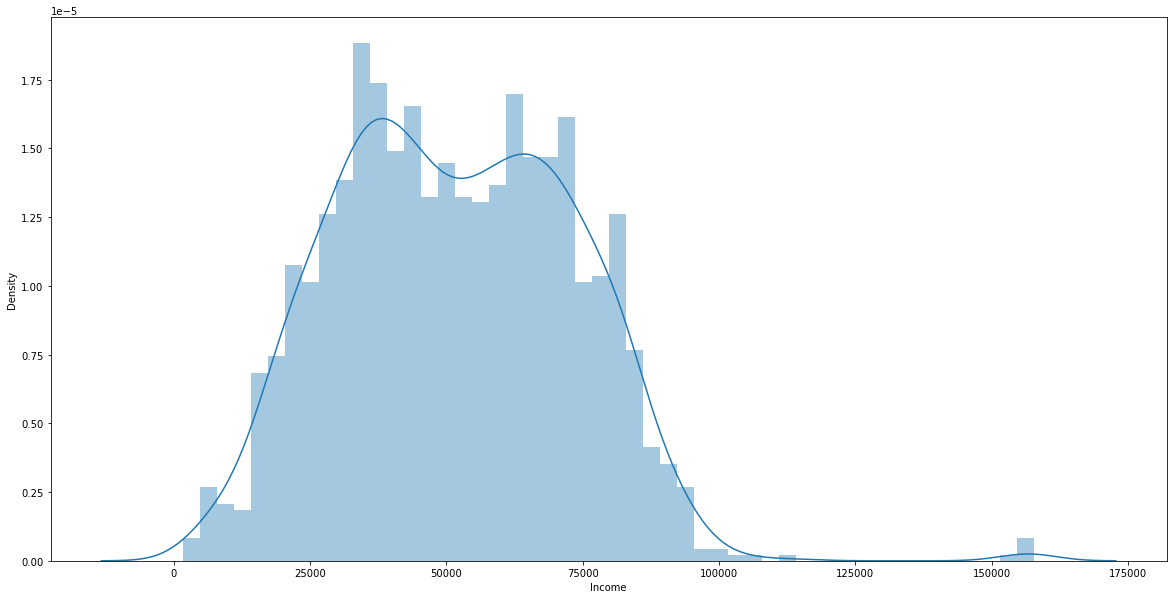

In [38]:
sns.distplot(x_train['Income'],bins=50)
plt.show()

In [39]:
x_train['Kidhome'].value_counts()

0    894
1    627
2     28
Name: Kidhome, dtype: int64

In [40]:
x_train['Teenhome'].value_counts()

0    813
1    700
2     36
Name: Teenhome, dtype: int64

In [41]:
x_train['Kidhome'].corr(x_train['Response'])

-0.08742000372637526

In [42]:
x_train['Teenhome'].corr(x_train['Response'])

-0.15629274692730452

In [43]:
len(x_train['Dt_Customer'].unique())

616

In [44]:
x_train['Dt_Customer'].unique()

array(['2013-11-14', '2013-02-16', '2012-11-03', '2013-03-12',
       '2013-02-26', '2013-07-02', '2012-10-05', '2013-08-15',
       '2013-09-11', '2013-04-29', '2014-01-26', '2013-08-31',
       '2013-08-13', '2014-05-19', '2013-03-28', '2013-03-16',
       '2014-01-21', '2014-05-01', '2012-08-12', '2013-03-03',
       '2013-10-06', '2013-10-03', '2012-08-31', '2013-03-31',
       '2013-05-11', '2013-06-04', '2012-08-15', '2012-12-03',
       '2013-11-25', '2014-04-12', '2013-05-25', '2014-03-08',
       '2014-05-11', '2013-12-26', '2013-12-01', '2012-10-25',
       '2012-10-26', '2012-08-20', '2013-02-10', '2013-01-09',
       '2012-10-13', '2013-03-06', '2013-11-17', '2013-05-15',
       '2013-06-22', '2014-06-29', '2013-04-12', '2013-11-15',
       '2013-08-28', '2012-11-30', '2012-12-26', '2013-11-20',
       '2012-11-23', '2013-05-03', '2012-08-08', '2013-07-07',
       '2013-01-12', '2013-01-10', '2012-10-10', '2012-12-28',
       '2014-02-12', '2013-01-19', '2014-06-17', '2014-

In [45]:
x_train['Dt_Customer'] = pd.to_datetime(x_train['Dt_Customer'])
x_test['Dt_Customer'] = pd.to_datetime(x_test['Dt_Customer'])

<ipython-input-45-7d9fe2bdfe70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Dt_Customer'] = pd.to_datetime(x_train['Dt_Customer'])
<ipython-input-45-7d9fe2bdfe70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Dt_Customer'] = pd.to_datetime(x_test['Dt_Customer'])


In [46]:
x_train['month'] = pd.to_datetime(x_train['Dt_Customer']).dt.month
x_train['year'] = pd.to_datetime(x_train['Dt_Customer']).dt.year

x_test['month'] = pd.to_datetime(x_test['Dt_Customer']).dt.month
x_test['year'] = pd.to_datetime(x_test['Dt_Customer']).dt.year

<ipython-input-46-31dab5b94c92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['month'] = pd.to_datetime(x_train['Dt_Customer']).dt.month
<ipython-input-46-31dab5b94c92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['year'] = pd.to_datetime(x_train['Dt_Customer']).dt.year
<ipython-input-46-31dab5b94c92>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [47]:
x_train.drop('Dt_Customer',axis=1,inplace=True)
x_test.drop('Dt_Customer',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1]:
#sns.distplot(x_train['Recency'],bins=80)
#plt.show()

In [49]:
x_train['Recency'].unique()

array([74, 82, 67,  6, 56, 68, 64,  0, 13, 90, 36,  7, 37, 53, 63, 72, 34,
       20, 84, 51, 92, 23, 97, 21, 33, 54, 44, 50, 94, 59, 26, 65, 11, 81,
       30, 83, 24, 31, 88, 47, 95, 93, 10, 60, 77, 42,  8, 78, 17, 32, 76,
       18,  4, 73, 66, 80, 52, 16, 87, 15, 86, 35, 48, 89, 43, 61, 62, 14,
       25, 39, 46, 45, 28, 71,  3,  2, 49, 40, 85, 75, 70, 79, 29, 22,  9,
       99, 41, 19, 12,  1, 98, 57, 55, 96, 69, 27, 38, 91, 58,  5],
      dtype=int64)

In [50]:
x_train['Recency'].corr(x_train['Response'])

-0.19550872326685698

In [51]:
len(x_train['MntWines'].unique())

639

In [2]:
#sns.distplot(x_train['MntWines'],bins=80)
#plt.show()

In [53]:
x_train['MntWines'].corr(x_train['Response'])

0.24801884928095386

In [3]:
#sns.distplot(x_train['MntFruits'],bins=80)
#plt.show()

In [55]:
x_train['MntFruits'].corr(x_train['Response'])

0.13237007266220815

In [4]:
#sns.distplot(x_train['MntMeatProducts'],bins=80)
#plt.show()

In [57]:
x_train['MntFruits'].corr(x_train['Response'])

0.13237007266220815

In [5]:
#sns.distplot(x_train['MntFishProducts'],bins=80)
#plt.show()

In [59]:
x_train['MntFruits'].corr(x_train['Response'])

0.13237007266220815

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


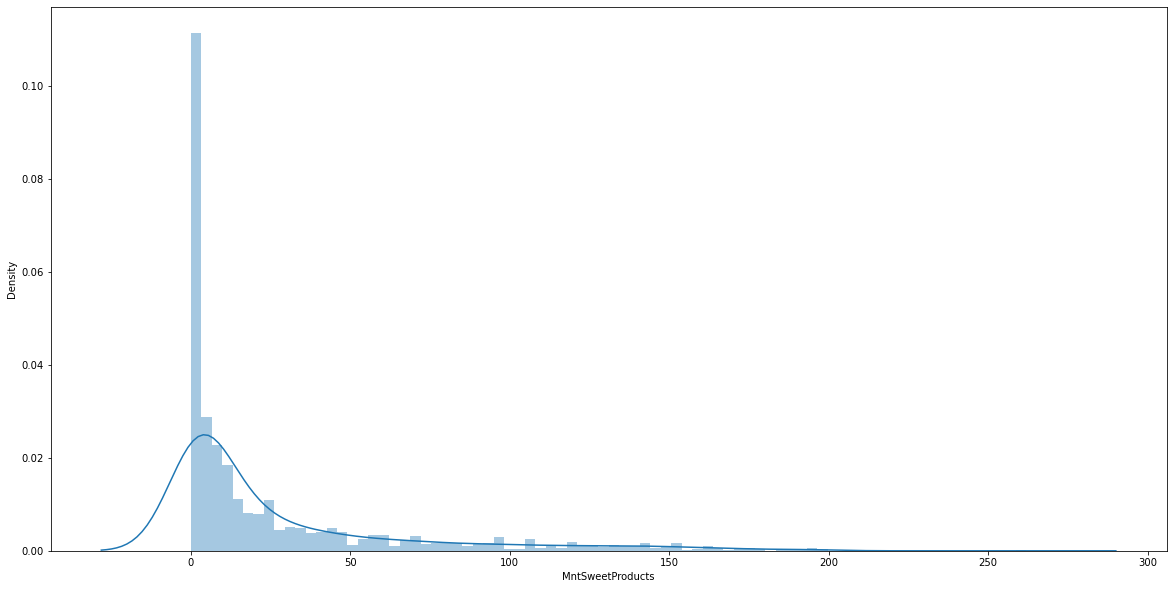

In [60]:
sns.distplot(x_train['MntSweetProducts'],bins=80)
plt.show()

In [61]:
x_train['MntSweetProducts'].corr(x_train['Response'])

0.12895568169720098

In [6]:
#sns.distplot(x_train['MntGoldProds'],bins=80)
#plt.show()

In [63]:
x_train['MntGoldProds'].corr(x_train['Response'])

0.12218628322959238

In [64]:
x_train['NumDealsPurchases'].unique()

array([ 1,  2,  4,  5,  0,  3,  6,  7,  9, 13, 12, 10, 11,  8, 15],
      dtype=int64)

In [65]:
x_train['NumDealsPurchases'].corr(x_train['Response'])

-0.00997258521659163

In [66]:
x_train['NumWebPurchases'].unique()

array([ 0,  7,  3,  4,  2,  9,  8,  1,  6,  5, 11, 10, 23, 25, 27],
      dtype=int64)

In [67]:
x_train['NumWebPurchases'].corr(x_train['Response'])

0.13925340940704783

In [68]:
x_train['NumCatalogPurchases'].unique()

array([ 0,  8,  1,  4,  2,  5, 28, 11,  3, 10,  6,  7,  9, 22],
      dtype=int64)

In [69]:
x_train['NumCatalogPurchases'].corr(x_train['Response'])

0.23105020655314637

In [70]:
x_train['NumStorePurchases'].unique()

array([ 3,  9,  7, 11, 13, 12,  8,  5,  0,  4,  6,  2, 10,  1],
      dtype=int64)

In [71]:
x_train['NumStorePurchases'].corr(x_train['Response'])

0.045401793856880465

In [72]:
x_train['NumWebVisitsMonth'].unique()

array([ 7,  5,  6,  8,  1,  2,  4,  3,  9, 20,  0, 10, 19, 14, 17, 13],
      dtype=int64)

In [73]:
x_train['NumWebVisitsMonth'].corr(x_train['Response'])

-0.015314474971971997

In [74]:
x_train['AcceptedCmp5'].corr(x_train['Response'])

0.3378710108209145

In [75]:
x_train['AcceptedCmp1'].corr(x_train['Response'])

0.3230350259818635

In [76]:
x_train['Complain'].corr(x_train['Response'])

-0.037179513713086886

In [77]:
x_train['Z_CostContact'].unique()

array([3], dtype=int64)

In [78]:
x_train['Z_Revenue'].unique()

array([11], dtype=int64)

In [79]:
x_train.drop('Z_CostContact',axis=1,inplace=True)
x_test.drop('Z_CostContact',axis=1,inplace=True)

x_train.drop('Z_Revenue',axis=1,inplace=True)
x_test.drop('Z_Revenue',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [80]:
x_train.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,month,year
661,1985,Graduation,Married,19986.0,1,0,74,3,6,5,0,2,6,1,0,0,3,7,0,0,0,0,0,0,0,11,2013
1052,1949,PhD,Married,69098.0,0,0,82,1315,22,780,145,0,178,1,7,8,9,5,0,0,0,0,0,0,0,2,2013


## Logistic

In [417]:
x_train1 = x_train.copy()
x_test1 = x_test.copy()

In [7]:
#sns.distplot(x_train1['Year_Birth'],bins=50)
#plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


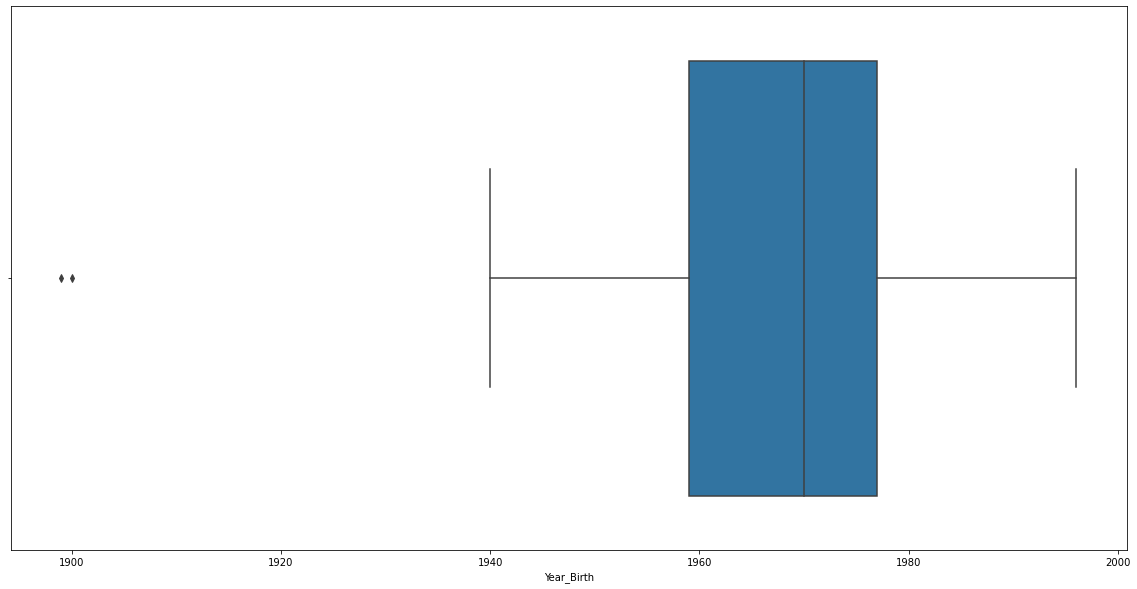

In [419]:
sns.boxplot(x_train1['Year_Birth'])
plt.show()

In [420]:
a = x_train1.loc[x_train1['Year_Birth']<1940]
a

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,month,year
192,1900,2n Cycle,Divorced,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,9,2013
339,1899,PhD,Together,83532.0,0,0,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,9,2013


In [421]:
x_train1['Year_Birth'][a.index] = 1940

<ipython-input-421-4591f84bd8ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train1['Year_Birth'][a.index] = 1940


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


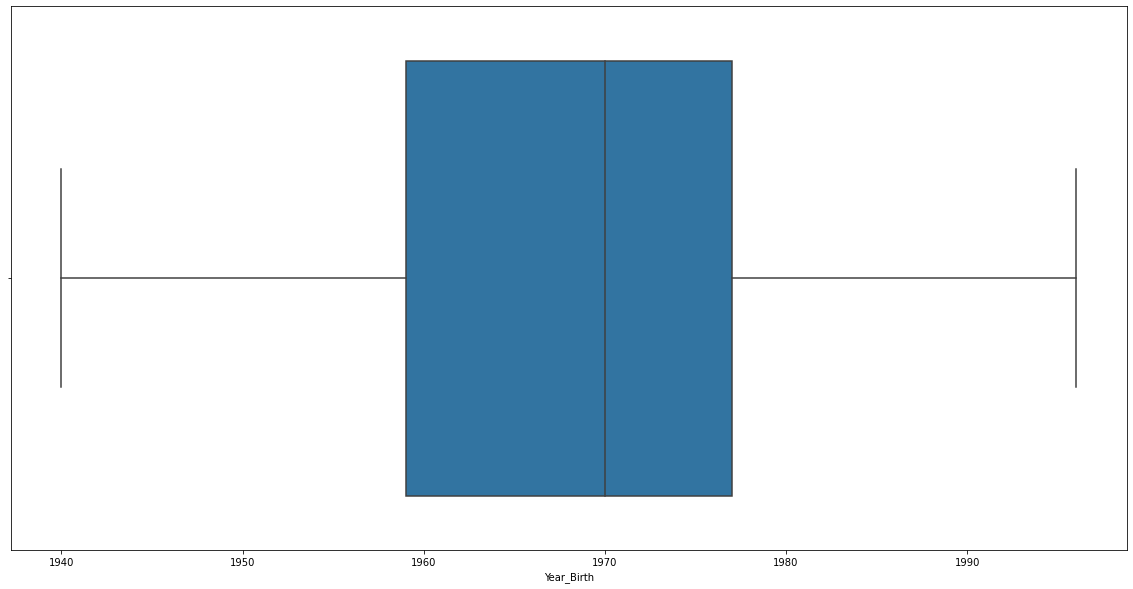

In [422]:
sns.boxplot(x_train1['Year_Birth'])
plt.show()

In [423]:
x_train['Education'].value_counts()

Graduation    793
PhD           318
Master        267
2n Cycle      129
Basic          42
Name: Education, dtype: int64

In [424]:
dummy = pd.get_dummies(x_train1['Education'])
x_train1 = pd.concat((x_train1,dummy),axis=1)

In [425]:
dummy = pd.get_dummies(x_test1['Education'])
x_test1 = pd.concat((x_test1,dummy),axis=1)

In [426]:
x_train1.drop('Education',axis=1,inplace=True)
x_test1.drop('Education',axis=1,inplace=True)

In [427]:
x_train1['Marital_Status'].value_counts()

Married     593
Together    401
Single      335
Divorced    156
Widow        59
Alone         2
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64

In [428]:
x_test1['Marital_Status'].value_counts()

Married     264
Together    172
Single      136
Divorced     76
Widow        17
Alone         1
Absurd        1
Name: Marital_Status, dtype: int64

In [429]:
dummy = pd.get_dummies(x_train1['Marital_Status'])
x_train1 = pd.concat((x_train1,dummy),axis=1)

In [430]:
dummy = pd.get_dummies(x_test1['Marital_Status'])
x_test1 = pd.concat((x_test1,dummy),axis=1)

In [431]:
x_train1.drop(['Marital_Status','Alone','YOLO','Absurd'],axis=1,inplace=True)
x_test1.drop(['Marital_Status','Alone','Absurd'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


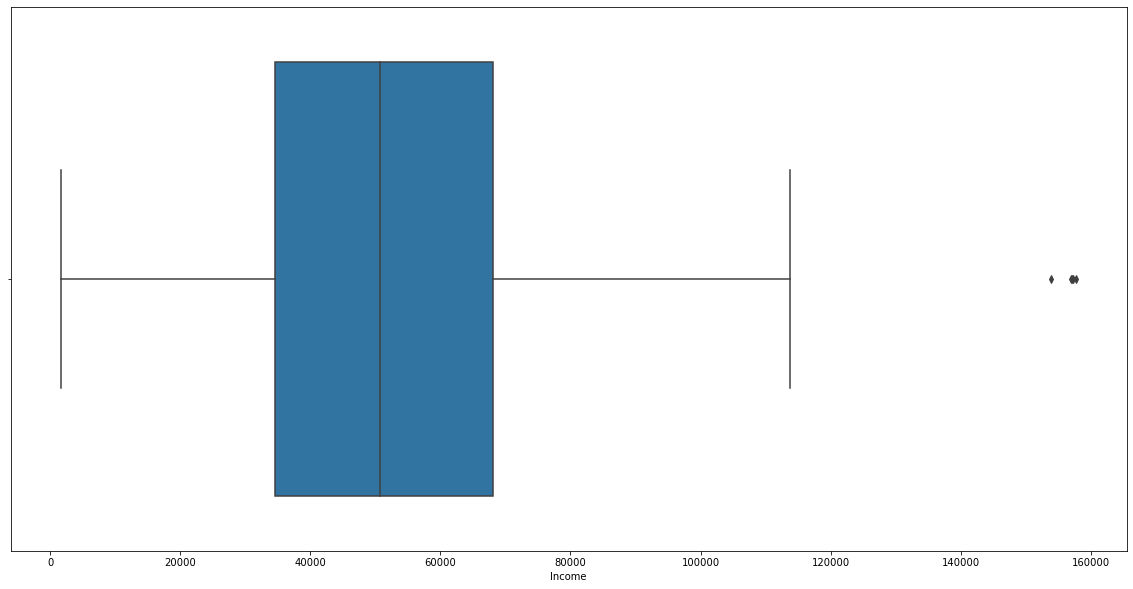

In [432]:
sns.boxplot(x_train1['Income'])
plt.show()

In [433]:
x_train1['Income'].value_counts().sort_index(ascending=False).head(10)

157733.0    1
157243.0    1
157146.0    1
156924.0    1
153924.0    1
113734.0    1
105471.0    1
102692.0    1
98777.0     2
96876.0     1
Name: Income, dtype: int64

In [434]:
a = x_train1.loc[x_train1['Income']>120000]
a

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,month,year,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow
1653,1977,157146.0,0,0,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,4,2013,0,0,1,0,0,0,0,0,1,0
1300,1971,157733.0,1,0,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,6,2013,0,0,0,1,0,0,0,0,1,0
164,1973,157243.0,0,1,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,3,2014,0,0,0,0,1,0,1,0,0,0
655,1975,153924.0,0,0,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2014,0,0,1,0,0,1,0,0,0,0
2132,1949,156924.0,0,0,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,8,2013,0,0,0,0,1,0,1,0,0,0


In [435]:
x_train1['Income'][a.index] = 113734

<ipython-input-435-92acd906e24c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train1['Income'][a.index] = 113734


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


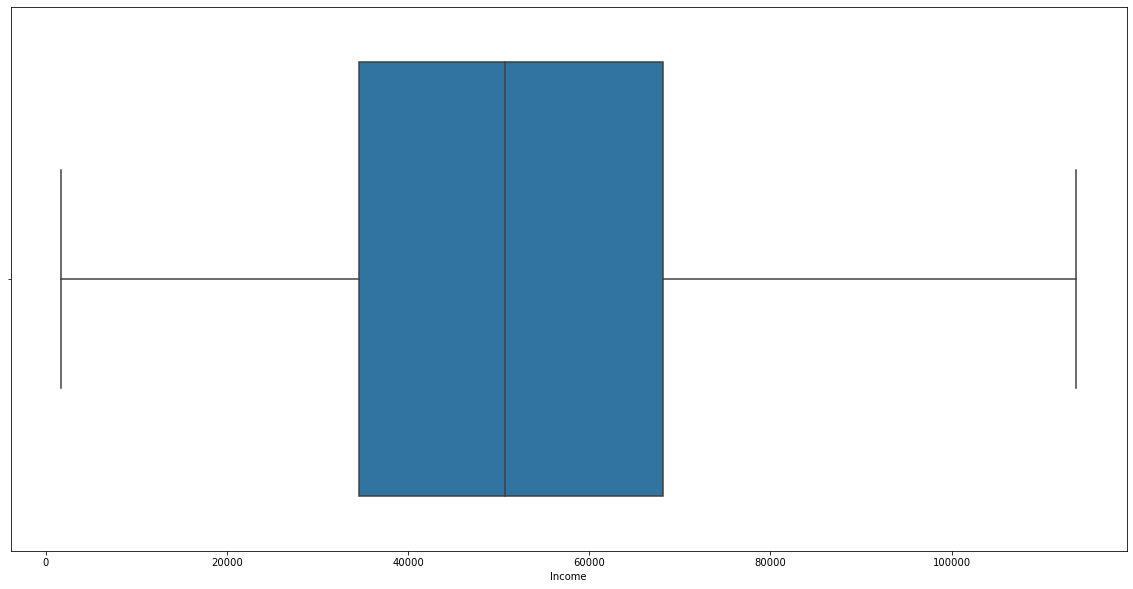

In [436]:
sns.boxplot(x_train1['Income'])
plt.show()

In [8]:
#sns.distplot(x_train1['Income'],bins=50)
#plt.show()

In [9]:
#sns.distplot(x_train1['NumDealsPurchases'],bins=20)
#plt.show()

In [10]:
#sns.distplot(x_train1['NumWebPurchases'],bins=20)
#plt.show()

In [11]:
#sns.distplot(x_train1['NumCatalogPurchases'],bins=20)
#plt.show()

In [12]:
#sns.distplot(x_train1['NumStorePurchases'],bins=20)
#plt.show()

In [13]:
#sns.distplot(x_train1['NumWebVisitsMonth'],bins=20)
#plt.show()

In [443]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

In [444]:
cols1 = ['Year_Birth','Income','Recency']
cols2 = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

In [445]:
x_train1[cols1] = scaler1.fit_transform(x_train1[cols1])
x_train1[cols2] = scaler2.fit_transform(x_train1[cols2])

x_test1[cols1] = scaler1.transform(x_test1[cols1])
x_test1[cols2] = scaler2.transform(x_test1[cols2])

In [446]:
print(x_train1.shape)
print(x_test1.shape)

(1549, 35)
(667, 35)


In [447]:
x_train1.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,month,year,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow
661,1.389143,-1.482282,1,0,0.882609,0.002011,0.030151,0.002899,0.000000,0.007634,0.018692,0.066667,0.000000,0.000000,0.230769,0.35,0,0,0,0,0,0,0,11,2013,0,0,1,0,0,0,1,0,0,0
1052,-1.693517,0.835642,0,0,1.160036,0.881367,0.110553,0.452174,0.559846,0.000000,0.554517,0.066667,0.259259,0.285714,0.692308,0.25,0,0,0,0,0,0,0,2,2013,0,0,0,0,1,0,1,0,0,0
1885,1.303513,0.048165,1,0,0.639860,0.123995,0.040201,0.077101,0.216216,0.213740,0.037383,0.133333,0.259259,0.035714,0.538462,0.35,0,0,0,0,0,0,0,11,2012,0,0,1,0,0,0,0,1,0,0
2026,-0.323446,-1.025135,1,1,-1.475522,0.006032,0.005025,0.001739,0.000000,0.015267,0.024922,0.066667,0.000000,0.000000,0.230769,0.30,0,0,0,0,0,0,0,3,2013,0,0,1,0,0,0,0,0,1,0
1275,0.190331,0.703727,0,1,0.258398,0.730563,0.060302,0.055652,0.061776,0.045802,0.186916,0.266667,0.111111,0.142857,0.846154,0.40,0,1,0,0,0,0,0,2,2013,0,0,1,0,0,0,1,0,0,0


In [448]:
x_train1.drop('Response',axis=1,inplace=True)
x_test1.drop('Response',axis=1,inplace=True)

In [449]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train1,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [450]:
y_train_pred = lr.predict(x_train1)
y_test_pred = lr.predict(x_test1)

In [451]:
y_train.mean()

0.15041962556488056

In [452]:
print("Accuracy:",accuracy_score(y_train, y_train_pred))
print("Precision:",precision_score(y_train, y_train_pred))
print("Recall:",recall_score(y_train, y_train_pred))

Accuracy: 0.8876694641704326
Precision: 0.7478991596638656
Recall: 0.38197424892703863


In [453]:
print("Accuracy:",accuracy_score(y_test, y_test_pred))
print("Precision:",precision_score(y_test, y_test_pred))
print("Recall:",recall_score(y_test, y_test_pred))

Accuracy: 0.881559220389805
Precision: 0.6909090909090909
Recall: 0.38


In [105]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [455]:
x_smote , y_smote = smote.fit_resample(x_train1,y_train)

In [456]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_smote, y_smote, train_size=0.7 , random_state=0,stratify=y_smote)

In [457]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train2,y_train2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [458]:
y_train_pred2 = lr.predict(x_train2)
y_test_pred2 = lr.predict(x_test2)

In [459]:
print("Accuracy:",accuracy_score(y_train2, y_train_pred2))
print("Precision:",precision_score(y_train2, y_train_pred2))
print("Recall:",recall_score(y_train2, y_train_pred2))

Accuracy: 0.8474484256243214
Precision: 0.8579418344519015
Recall: 0.8327904451682954


In [460]:
print("Accuracy:",accuracy_score(y_test2, y_test_pred2))
print("Precision:",precision_score(y_test2, y_test_pred2))
print("Recall:",recall_score(y_test2, y_test_pred2))

Accuracy: 0.8329113924050633
Precision: 0.8833819241982507
Recall: 0.7670886075949367


In [461]:
parameters = {'C':[0.01,0.01,0.1,1,10,100] , 'solver':['lbfgs','newton-cg'],'max_iter':[100,150,200]}
lr = LogisticRegression(random_state=0)
scikit_GridSearchCV = GridSearchCV(lr,parameters)
scikit_GridSearchCV.fit(x_train2 , y_train2)
print(f'Best Estimator : {scikit_GridSearchCV.best_estimator_}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linese

Best Estimator : LogisticRegression(C=10, max_iter=150, random_state=0, solver='newton-cg')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

In [462]:
y_train_pred3 = scikit_GridSearchCV.predict(x_train2)
y_test_pred3 = scikit_GridSearchCV.predict(x_test2)

In [463]:
print("Accuracy:",accuracy_score(y_train2, y_train_pred3))
print("Precision:",precision_score(y_train2, y_train_pred3))
print("Recall:",recall_score(y_train2, y_train_pred3))

Accuracy: 0.8995656894679696
Precision: 0.916289592760181
Recall: 0.8794788273615635


In [464]:
print("Accuracy:",accuracy_score(y_test2, y_test_pred3))
print("Precision:",precision_score(y_test2, y_test_pred3))
print("Recall:",recall_score(y_test2, y_test_pred3))

Accuracy: 0.8974683544303798
Precision: 0.9361111111111111
Recall: 0.8531645569620253


In [465]:
y_test_pred4 = scikit_GridSearchCV.predict_proba(x_test2)[:,1]
y_test_pred4

array([2.72829942e-04, 7.69986107e-03, 1.36987678e-01, 9.74926267e-01,
       9.99314285e-01, 2.83236756e-01, 1.45611113e-01, 1.36771394e-03,
       1.99060405e-01, 8.12510911e-02, 9.95882261e-01, 3.07261239e-01,
       1.03972896e-01, 9.93369522e-01, 9.48236183e-01, 1.46585329e-02,
       7.40461635e-02, 9.97948445e-01, 2.66180079e-01, 1.44193346e-01,
       6.79578503e-01, 1.54436397e-03, 7.59224053e-01, 7.22913820e-01,
       3.98742254e-01, 9.99741395e-01, 6.56467997e-03, 9.60200385e-01,
       3.85379664e-03, 9.99122086e-01, 9.95976876e-01, 4.86460441e-01,
       9.80717775e-01, 9.55676771e-01, 4.56048959e-02, 1.28127242e-03,
       9.89319170e-01, 2.34115065e-02, 9.92958416e-01, 9.99808982e-01,
       9.99876801e-01, 3.85746293e-01, 9.82429576e-01, 4.46585671e-01,
       4.71410970e-02, 7.85807413e-03, 9.99790263e-01, 9.95858383e-01,
       9.65461411e-01, 5.39562275e-01, 3.83293438e-01, 9.88639947e-01,
       3.17192355e-01, 3.27378024e-01, 1.84421232e-01, 1.53167099e-01,
      

In [466]:
final_pred3 = pd.DataFrame(y_test_pred4)
final_pred3

,0
0,0.000273
1,0.007700
2,0.136988
3,0.974926
4,0.999314
...,...
785,0.988397
786,0.016469
787,0.986372
788,0.064788


In [467]:
y_test2

376     0
247     0
1264    0
1948    1
2622    1
       ..
2308    1
1209    0
2149    1
286     0
1797    1
Name: Response, Length: 790, dtype: int64

In [468]:
fpr , tpr , thresolds = roc_curve(y_test2 , final_pred3)
thresolds

array([1.99999669e+00, 9.99996694e-01, 9.97798730e-01, 9.97770053e-01,
       9.49849091e-01, 9.48236183e-01, 9.42649497e-01, 8.79792338e-01,
       8.74025101e-01, 8.16449674e-01, 8.15400569e-01, 8.09479656e-01,
       8.07434301e-01, 8.06994869e-01, 8.05555654e-01, 8.02673990e-01,
       8.01317065e-01, 7.69536182e-01, 7.59224053e-01, 7.57497535e-01,
       7.54235664e-01, 7.54066957e-01, 7.42562326e-01, 7.38502217e-01,
       7.35750644e-01, 6.95048284e-01, 6.86963694e-01, 6.81707898e-01,
       6.79578503e-01, 6.01073604e-01, 5.98968331e-01, 5.97801393e-01,
       5.84893729e-01, 5.73054439e-01, 5.67744581e-01, 5.57682741e-01,
       5.39562275e-01, 5.31261378e-01, 5.30190857e-01, 5.19578375e-01,
       5.19102359e-01, 5.08199920e-01, 5.02683190e-01, 4.94188457e-01,
       4.87084725e-01, 4.86530043e-01, 4.86460441e-01, 4.78078803e-01,
       4.73053292e-01, 4.67341574e-01, 4.52437952e-01, 4.51468818e-01,
       4.35113174e-01, 4.26436986e-01, 4.24146744e-01, 4.12160524e-01,
      

In [469]:
accuracy_ls = []
for thres in thresolds:
    y_pred = np.where(final_pred3>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test2, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresolds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresolds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresolds,accuracy
65,0.361673,0.905063
71,0.338203,0.905063
69,0.340313,0.905063
63,0.372402,0.905063
62,0.374759,0.903797


In [470]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

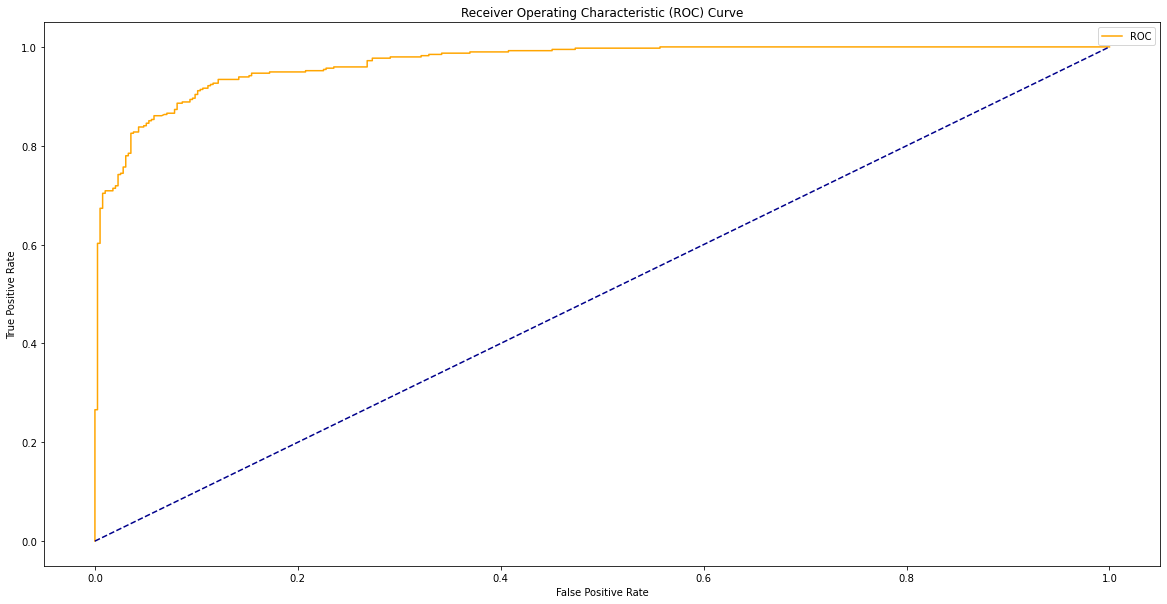

In [471]:
plot_roc_curve(fpr,tpr)

In [497]:
y_pred5 = scikit_GridSearchCV.decision_function(x_test2)

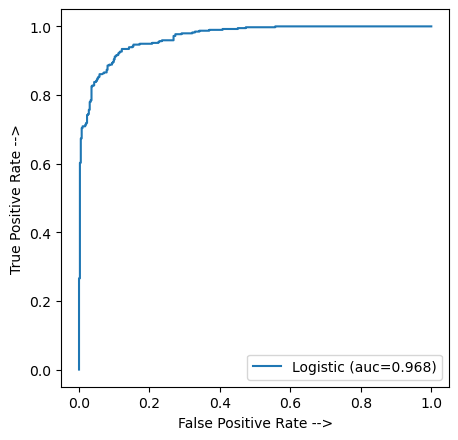

In [499]:
logidtic_fpr , logidtic_tpr , threshold=roc_curve(y_test2 ,y_pred5 )
auc_logistic = auc(logidtic_fpr ,logidtic_tpr)

plt.figure(figsize=(5,5) , dpi=100)
plt.plot(logidtic_fpr , logidtic_tpr , label='Logistic (auc=%0.3f)'%auc_logistic)
# plt.plot(logidtic_fpr , logidtic_tpr , marker='.' , label='Logistic (auc=%0.3f)'%auc_logistic)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

In [472]:
print('Roc auc score',roc_auc_score(y_test2, final_pred3))

Roc auc score 0.9679570581637558


In [473]:
final_pred3.loc[final_pred3[0] >=0.439179 , 0] = 1
final_pred3.loc[final_pred3[0] <=0.439179 , 0] = 0

In [474]:
print("Accuracy:",accuracy_score(y_test2, final_pred3))
print("Precision:",precision_score(y_test2, final_pred3))
print("Recall:",recall_score(y_test2, final_pred3))

Accuracy: 0.9012658227848102
Precision: 0.916010498687664
Recall: 0.8835443037974684


In [486]:
y_test_pred5 = scikit_GridSearchCV.predict_proba(x_test2)[:,1]
y_test_pred5

array([2.72829942e-04, 7.69986107e-03, 1.36987678e-01, 9.74926267e-01,
       9.99314285e-01, 2.83236756e-01, 1.45611113e-01, 1.36771394e-03,
       1.99060405e-01, 8.12510911e-02, 9.95882261e-01, 3.07261239e-01,
       1.03972896e-01, 9.93369522e-01, 9.48236183e-01, 1.46585329e-02,
       7.40461635e-02, 9.97948445e-01, 2.66180079e-01, 1.44193346e-01,
       6.79578503e-01, 1.54436397e-03, 7.59224053e-01, 7.22913820e-01,
       3.98742254e-01, 9.99741395e-01, 6.56467997e-03, 9.60200385e-01,
       3.85379664e-03, 9.99122086e-01, 9.95976876e-01, 4.86460441e-01,
       9.80717775e-01, 9.55676771e-01, 4.56048959e-02, 1.28127242e-03,
       9.89319170e-01, 2.34115065e-02, 9.92958416e-01, 9.99808982e-01,
       9.99876801e-01, 3.85746293e-01, 9.82429576e-01, 4.46585671e-01,
       4.71410970e-02, 7.85807413e-03, 9.99790263e-01, 9.95858383e-01,
       9.65461411e-01, 5.39562275e-01, 3.83293438e-01, 9.88639947e-01,
       3.17192355e-01, 3.27378024e-01, 1.84421232e-01, 1.53167099e-01,
      

In [487]:
final_pred5 = pd.DataFrame(y_test_pred5)
final_pred5

,0
0,0.000273
1,0.007700
2,0.136988
3,0.974926
4,0.999314
...,...
785,0.988397
786,0.016469
787,0.986372
788,0.064788


In [488]:
y_test2

376     0
247     0
1264    0
1948    1
2622    1
       ..
2308    1
1209    0
2149    1
286     0
1797    1
Name: Response, Length: 790, dtype: int64

In [489]:
fpr , tpr , thresolds = roc_curve(y_test2 , final_pred5)
thresolds

array([1.99999669e+00, 9.99996694e-01, 9.97798730e-01, 9.97770053e-01,
       9.49849091e-01, 9.48236183e-01, 9.42649497e-01, 8.79792338e-01,
       8.74025101e-01, 8.16449674e-01, 8.15400569e-01, 8.09479656e-01,
       8.07434301e-01, 8.06994869e-01, 8.05555654e-01, 8.02673990e-01,
       8.01317065e-01, 7.69536182e-01, 7.59224053e-01, 7.57497535e-01,
       7.54235664e-01, 7.54066957e-01, 7.42562326e-01, 7.38502217e-01,
       7.35750644e-01, 6.95048284e-01, 6.86963694e-01, 6.81707898e-01,
       6.79578503e-01, 6.01073604e-01, 5.98968331e-01, 5.97801393e-01,
       5.84893729e-01, 5.73054439e-01, 5.67744581e-01, 5.57682741e-01,
       5.39562275e-01, 5.31261378e-01, 5.30190857e-01, 5.19578375e-01,
       5.19102359e-01, 5.08199920e-01, 5.02683190e-01, 4.94188457e-01,
       4.87084725e-01, 4.86530043e-01, 4.86460441e-01, 4.78078803e-01,
       4.73053292e-01, 4.67341574e-01, 4.52437952e-01, 4.51468818e-01,
       4.35113174e-01, 4.26436986e-01, 4.24146744e-01, 4.12160524e-01,
      

In [490]:
recall_ls = []
for thres in thresolds:
    y_pred = np.where(final_pred5>thres,1,0)
    recall_ls.append(recall_score(y_test2, y_pred))
    
recall_ls = pd.concat([pd.Series(thresolds), pd.Series(recall_ls)],
                        axis=1)
recall_ls.columns = ['thresolds', 'recall']
recall_ls.sort_values(by='recall', ascending=False, inplace=True)
recall_ls.head()

,thresolds,recall
132,0.000166,1.0
131,0.001281,1.0
130,0.001323,1.0
129,0.003864,1.0
128,0.004118,1.0


In [491]:
recall_ls[60:90]

,thresolds,recall
72,0.327378,0.924051
71,0.338203,0.924051
69,0.340313,0.921519
70,0.339225,0.921519
68,0.341516,0.918987
67,0.342909,0.916456
66,0.360443,0.913924
65,0.361673,0.913924
64,0.369321,0.911392
63,0.372402,0.911392


In [492]:
final_pred5.loc[final_pred5[0] >=0.327378 , 0] = 1
final_pred5.loc[final_pred5[0] <=0.327378 , 0] = 0

In [493]:
print("Accuracy:",accuracy_score(y_test2, final_pred5))
print("Precision:",precision_score(y_test2, final_pred5))
print("Recall:",recall_score(y_test2, final_pred5))

Accuracy: 0.9050632911392406
Precision: 0.8883495145631068
Recall: 0.9265822784810127


In [494]:
print('Roc auc score',roc_auc_score(y_test2, final_pred5))

Roc auc score 0.9050632911392406


We should try to do a standardization only on features and then apply logistic